In [ ]:
%matplotlib inline


# Used Logistic Regression here with the confusion matrix to find out if the numbers in the images predicted are the actual number of not

In [2]:
import pandas as pd
from sklearn.datasets import load_digits#training dataset
import matplotlib.pyplot as plt

In [3]:
data  = load_digits()

In [4]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

as one of the column names is also data so better not to name the whole dataset as data

In [5]:
digits = load_digits()

In [ ]:
digits.head()#this error is because digits is not a dataframe

AttributeError: head

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
digits.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
digits.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

So we see that the images and data columns are exactly same or images depict data

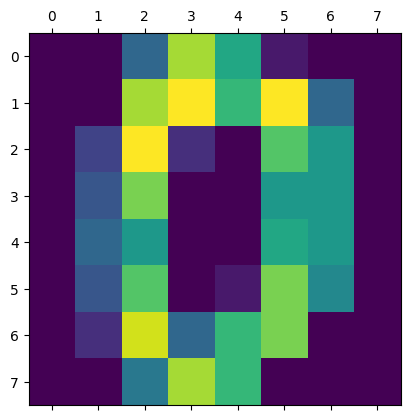

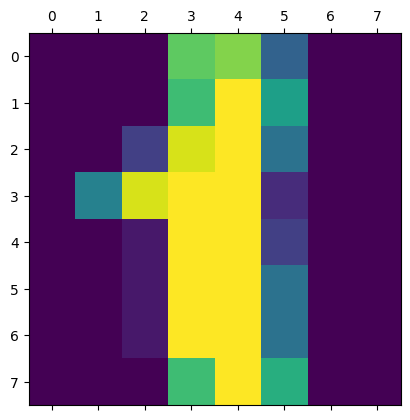

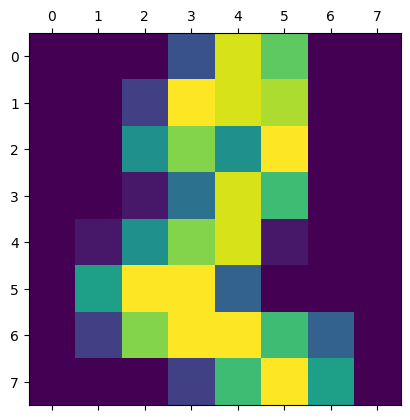

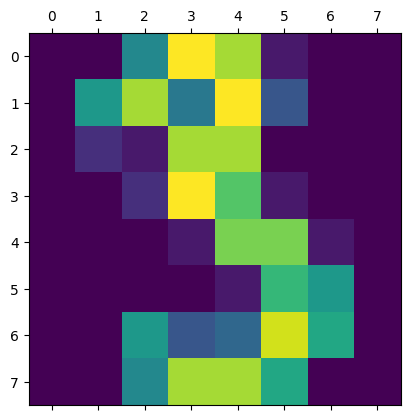

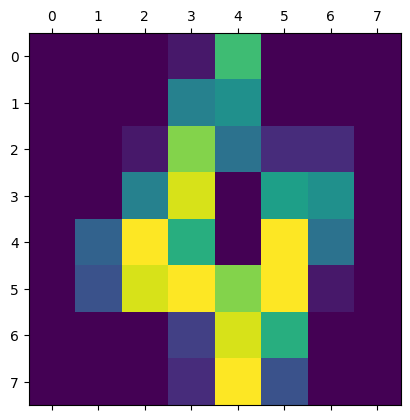

In [9]:
for i in range(5):
    plt.matshow(digits.images[i])

so these are the images that have to be identified


In [10]:
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [14]:
len(X_train)

1437

In [15]:
len(X_test)

360

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [17]:
model.fit(X_train,Y_train)

c:\Users\Surya Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model.score(X_test,Y_test)#tests the accuracy of the model against the y_test values 

0.9666666666666667

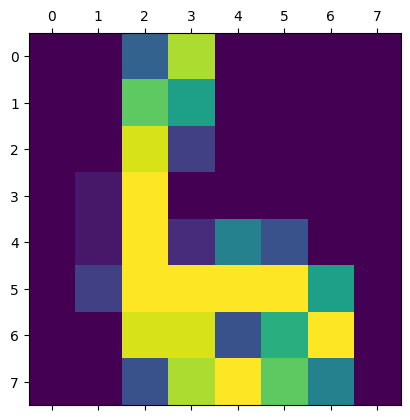

In [19]:
plt.matshow(digits.images[67])

In [20]:
model.predict([digits.data[67]])

array([6])

In [22]:
digits.target[67]

np.int64(6)

so we see the values predicted is 6 and the original value is also 6.

In [27]:
model.predict(digits.data[1:5])

array([1, 2, 3, 4])

In [28]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(Y_test,y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  2,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  0,  1,  0,  1,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 28]])

Text(50.722222222222214, 0.5, 'Truth')

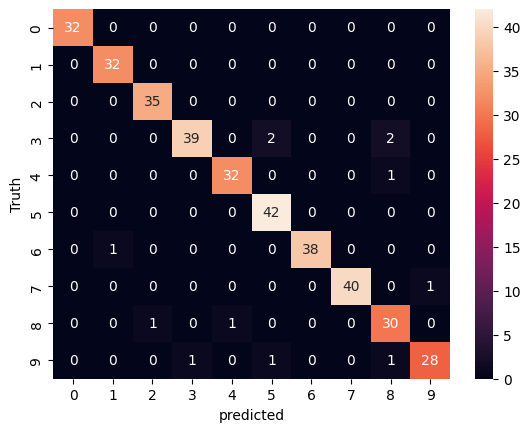

In [31]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

So, All the numbers in other than 0 not in the diagonals are wrongly predicted values;